# Wind Energy Analysis in Ireland

Author: Philip Cullen

This notebook analyses historical wind speed data from Met Éireann
to explore wind energy potential and long-term trends across Ireland.

In [2]:
import os
os.listdir("data")

['mullingar.csv', 'valentia_obsrv.csv', 'malin_head.csv', 'dublin_airport.csv']

In [3]:
import pandas as pd

df = pd.read_csv(
    "data/malin_head.csv",
    sep=";",
    skiprows=22
)
df.head()

,"date,ind,rain,ind,temp,ind,wetb,dewpt,vappr,rhum,msl,ind,wdsp,ind,wddir,ww,w,sun,vis,clht,clamt"
0,"01-may-1955 01:00,0,0.0,0,8.5,0,7.2,5.5,9.1,83..."
1,"01-may-1955 02:00,0,0.0,0,8.2,0,7.2,6.1,9.3,85..."
2,"01-may-1955 03:00,3,0.0,0,7.3,0,6.6,5.5,9.3,91..."
3,"01-may-1955 04:00,3,0.0,0,7.8,0,7.2,6.1,9.6,91..."
4,"01-may-1955 05:00,0,0.0,0,8.1,0,7.3,6.6,9.7,89..."


In [4]:
df.columns

Index(['date,ind,rain,ind,temp,ind,wetb,dewpt,vappr,rhum,msl,ind,wdsp,ind,wddir,ww,w,sun,vis,clht,clamt'], dtype='object')

## 2. Data Loading and Initial Inspection

This section involves the loading and initial inspection of the Met Éireann weather data.

This includes:

- Identifying the header structure used in the raw CSV files

- Verifying that the data loads correctly into pandas DataFrames

- Confirming column names and data types

- Checking dataset size

- Inspecting for missing or malformed values

- Verifying station identifiers after merging multiple datasets

This step ensures the data is correctly structured and suitable for further cleaning, analysis, and visualisation in later stages of the project.

In [5]:
import pandas as pd
import numpy as np

In [6]:
def load_station(path, station_name, skiprows=0):
    df = pd.read_csv(path, sep=";", skiprows=skiprows)
    df["station"] = station_name
    return df

In [7]:
malin = load_station(
    "data/malin_head.csv",
    station_name="Malin Head",
    skiprows=23
)

malin.head()

,"date,ind,rain,ind,temp,ind,wetb,dewpt,vappr,rhum,msl,ind,wdsp,ind,wddir,ww,w,sun,vis,clht,clamt",station
0,"01-may-1955 01:00,0,0.0,0,8.5,0,7.2,5.5,9.1,83...",Malin Head
1,"01-may-1955 02:00,0,0.0,0,8.2,0,7.2,6.1,9.3,85...",Malin Head
2,"01-may-1955 03:00,3,0.0,0,7.3,0,6.6,5.5,9.3,91...",Malin Head
3,"01-may-1955 04:00,3,0.0,0,7.8,0,7.2,6.1,9.6,91...",Malin Head
4,"01-may-1955 05:00,0,0.0,0,8.1,0,7.3,6.6,9.7,89...",Malin Head


In [8]:
valentia = load_station("data/valentia_obsrv.csv", "Valentia", skiprows=23)
dublin = load_station("data/dublin_airport.csv", "Dublin Airport", skiprows=23)
mullingar = load_station("data/mullingar.csv", "Mullingar", skiprows=17)

In [9]:
malin.columns


Index(['date,ind,rain,ind,temp,ind,wetb,dewpt,vappr,rhum,msl,ind,wdsp,ind,wddir,ww,w,sun,vis,clht,clamt', 'station'], dtype='object')

In [10]:
valentia.columns

Index(['date,ind,rain,ind,temp,ind,wetb,dewpt,vappr,rhum,msl,ind,wdsp,ind,wddir,ww,w,sun,vis,clht,clamt', 'station'], dtype='object')

In [11]:
dublin.columns

Index(['date,ind,rain,ind,temp,ind,wetb,dewpt,vappr,rhum,msl,ind,wdsp,ind,wddir,ww,w,sun,vis,clht,clamt', 'station'], dtype='object')

In [12]:
mullingar.columns

Index(['date,ind,rain,ind,temp,ind,wetb,dewpt,vappr,rhum,msl,ind,wdsp,ind,wddir', 'station'], dtype='object')

### Data Overview

- Daily historical weather data from Met Éireann
- Four stations: two coastal, two inland
- Data includes wind speed and additional meteorological variables
- Files contain metadata rows and use semicolon delimiters, requiring preprocessing

Initial inspection revealed that the Met Éireann CSV files include
metadata rows and non-standard headers, requiring additional preprocessing
before analysis.

## 3. Data Cleaning and Standardisation

This section resolves the formatting issues identified during initial
inspection, including correcting headers, standardising column names,
and preparing the data for analysis.

Some columns contain mixed data types due to missing values and coded entries in the raw Met Éireann files. These are handled explicitly during data cleaning and type conversion.

In [13]:
import warnings

In [14]:
warnings.filterwarnings("ignore")

In [15]:
def load_and_clean_station(path, station_name, header_row):
    df = pd.read_csv(path, header=header_row)

    # Add station label
    df["station"] = station_name

    # Keep only required columns
    df = df[["date", "wdsp", "wddir", "station"]]

    # Convert datatypes
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    df["wdsp"] = pd.to_numeric(df["wdsp"], errors="coerce")
    df["wddir"] = pd.to_numeric(df["wddir"], errors="coerce")

    # Drop rows with missing core values
    df = df.dropna(subset=["date", "wdsp", "wddir"])

    return df

In [16]:
malin = load_and_clean_station("data/malin_head.csv", "Malin Head", 20)
valentia = load_and_clean_station("data/valentia_obsrv.csv", "Valentia", 20)
dublin = load_and_clean_station("data/dublin_airport.csv", "Dublin Airport", 20)
mullingar = load_and_clean_station("data/mullingar.csv", "Mullingar", 14)

df = pd.concat([malin, valentia, dublin, mullingar], ignore_index=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493329 entries, 0 to 2493328
Data columns (total 4 columns):
 #   Column   Dtype         
---  ------   -----         
 0   date     datetime64[ns]
 1   wdsp     float64       
 2   wddir    float64       
 3   station  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 76.1+ MB


In [18]:
df.head()
df["station"].value_counts()

station
Dublin Airport    709296
Valentia          709183
Malin Head        618660
Mullingar         456190
Name: count, dtype: int64

## 4. Data Cleaning & Feature Preparation

This step focuses on preparing the dataset for wind speed analysis.

Relevant columns were selected, data types were converted where necessary, and invalid or missing values were removed.

Additional time-based features were created to support temporal analysis of wind patterns across stations.

In [19]:
cols = ["date", "wdsp", "wddir", "station"]
df_wind = df[cols].copy()

df_wind["date"] = pd.to_datetime(df_wind["date"], errors="coerce")

In [20]:
df_wind["wdsp"] = pd.to_numeric(df_wind["wdsp"], errors="coerce")
df_wind["wddir"] = pd.to_numeric(df_wind["wddir"], errors="coerce")

In [21]:
df_wind = df_wind.dropna(subset=["date", "wdsp"])

In [22]:
df_wind["year"] = df_wind["date"].dt.year
df_wind["month"] = df_wind["date"].dt.month

In [23]:
df_wind.info()
df_wind.describe()
df_wind["station"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493329 entries, 0 to 2493328
Data columns (total 6 columns):
 #   Column   Dtype         
---  ------   -----         
 0   date     datetime64[ns]
 1   wdsp     float64       
 2   wddir    float64       
 3   station  object        
 4   year     int32         
 5   month    int32         
dtypes: datetime64[ns](1), float64(2), int32(2), object(1)
memory usage: 95.1+ MB


station
Dublin Airport    709296
Valentia          709183
Malin Head        618660
Mullingar         456190
Name: count, dtype: int64

## 5. Exploratory Wind Speed Analysis

This step explores wind speed patterns across selected Irish weather stations.

Average wind speeds are compared between locations, and seasonal trends are examined using monthly aggregates.

The analysis highlights clear differences between coastal and inland stations and demonstrates the suitability of certain regions for wind energy generation.

In [26]:
import matplotlib.pyplot as plt

In [27]:
mean_wind = (
    df_wind
    .groupby("station")["wdsp"]
    .mean()
    .sort_values(ascending=False)
)

mean_wind

station
Malin Head        15.209558
Dublin Airport    10.114264
Valentia          10.103674
Mullingar          7.289783
Name: wdsp, dtype: float64

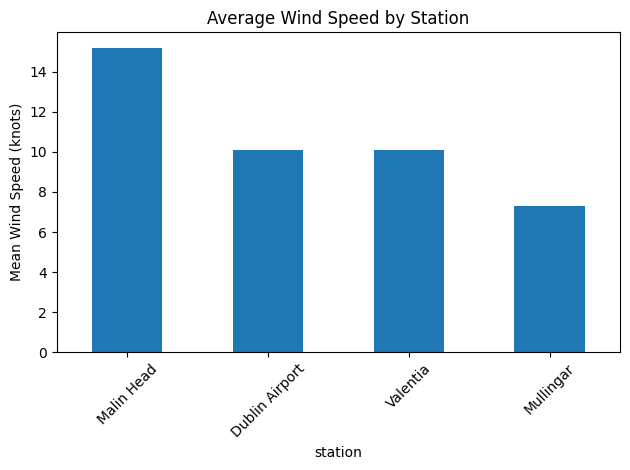

In [28]:
mean_wind.plot(kind="bar")
plt.ylabel("Mean Wind Speed (knots)")
plt.title("Average Wind Speed by Station")
plt.xticks(rotation=45)
plt.tight_layout()

The coastal stations (Malin Head and Valentia) exhibit higher average wind speeds than inland locations such as Mullingar. 

Interesitngly, Dublin airpot has a similar average windspeed to Valentia.

This aligns with expectations and suggests that coastal regions are generally more suitable for wind energy generation.

In [29]:
monthly_wind = (
    df_wind
    .groupby(["station", "month"])["wdsp"]
    .mean()
    .reset_index()
)

monthly_wind.head()

,station,month,wdsp
0,Dublin Airport,1,11.918492
1,Dublin Airport,2,11.718295
2,Dublin Airport,3,11.196369
3,Dublin Airport,4,9.988254
4,Dublin Airport,5,9.223583


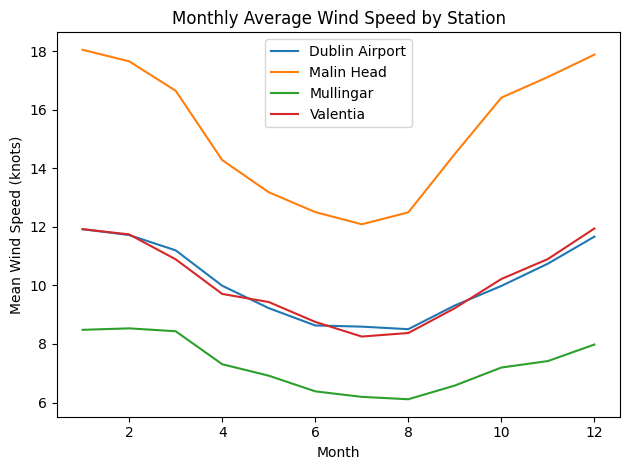

In [30]:
for station in monthly_wind["station"].unique():
    data = monthly_wind[monthly_wind["station"] == station]
    plt.plot(data["month"], data["wdsp"], label=station)

plt.xlabel("Month")
plt.ylabel("Mean Wind Speed (knots)")
plt.title("Monthly Average Wind Speed by Station")
plt.legend()
plt.tight_layout()

Wind speeds are generally higher during winter months and lower during summer across all stations. 

This seasonal pattern is important for understanding expected variability in wind power generation throughout the year.

#### Dublin Airport vs Valentia Observatory

Although Valentia is more exposed to Atlantic weather systems, long-term average wind speeds at Dublin Airport are comparable, likely due to consistent maritime influence and prevailing wind patterns. 

This highlights the importance of considering not only mean wind speed but also variability and extremes when assessing wind energy potential.